In [1]:
import os
import pandas as pd

In [2]:
# Specify the folder containing Parquet files
folder_path = 'C:\\Users\\clair\\MasterThesis\\Feature_selected_data\\'

# List all Parquet files in the folder
parquet_files = [file for file in os.listdir(folder_path) if file.endswith('.parquet')]

# Read each Parquet file into a DataFrame and assign it to a variable
for parquet_file in parquet_files:
    location_name = parquet_file.split('_')[0]  # Extract location name from file name
    file_path = os.path.join(folder_path, parquet_file)
    globals()[f"{location_name}_df"] = pd.read_parquet(file_path)

In [3]:
# Print the first few rows of each DataFrame
print(canyons_df.head())
print(disney_df.head())
print(miami_df.head())
print(vegas_df.head())

# Check the shape of each DataFrame
print(canyons_df.shape)
print(disney_df.shape)
print(miami_df.shape)
print(vegas_df.shape)

  Canyons Ski Resort_STATION_NUM Canyons Ski Resort_STATION_ID  \
0                              4                           SNC   
1                              4                           SNC   
2                              4                           SNC   
3                              4                           SNC   
4                              4                           SNC   

   Canyons Ski Resort_air_temp_set_1  Canyons Ski Resort_wind_speed_set_1  \
0                             8.9825                               0.4675   
1                             7.5175                               0.5150   
2                             6.3575                               0.3375   
3                             5.6200                               0.2925   
4                             6.0650                               0.5600   

   Canyons Ski Resort_solar_radiation_set_1  \
0                                  0.000000   
1                                  0.000000   

# Recurrent Neural Network(RNN) using Long Short-Term Memory layers (LSTM)

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Canyons Data 

In [5]:
# Extract features
X = canyons_df.drop(columns=['Canyons Ski Resort_air_temp_set_1', 'Canyons Ski Resort_wind_speed_set_1', 'Canyons Ski Resort_solar_radiation_set_1', 'Canyons Ski Resort_precip_accum_set_1', 'Canyons Ski Resort_STATION_NUM', 'Canyons Ski Resort_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Define target variables
target_variables = ['Canyons Ski Resort_air_temp_set_1', 'Canyons Ski Resort_wind_speed_set_1', 'Canyons Ski Resort_solar_radiation_set_1', 'Canyons Ski Resort_precip_accum_set_1']

# Extract the target variables
y = canyons_df[target_variables]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variables
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Reshape data for LSTM (assuming your data is 2D with shape [samples, features])
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Check the shapes of your data
print("Shapes:")
print("X_train_reshaped:", X_train_reshaped.shape)
print("y_train_scaled:", y_train_scaled.shape)
print("X_test_reshaped:", X_test_reshaped.shape)
print("y_test_scaled:", y_test_scaled.shape)

# Check that target_variable exists in y_test
if isinstance(y_test, pd.DataFrame):
    for target_variable in target_variables:
        if target_variable not in y_test.columns:
            print(f"Error: {target_variable} not found in y_test columns.")
else:
    print("Warning: y_test is not a pandas DataFrame.")

# Build the multi-output LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(target_variables)))  # Output layer with multiple neurons, one for each target variable

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Make predictions on the test set
y_pred_scaled = model.predict(X_test_reshaped)

# Inverse scale the predictions to get them back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Evaluate the model with MAE, MSE, and R2 for each target variable
for i in range(y_test_scaled.shape[1]):
    y_test_array = y_test_scaled[:, i]
    y_pred_array = y_pred_scaled[:, i]

    mae = mean_absolute_error(y_test_array, y_pred_array)
    mse = mean_squared_error(y_test_array, y_pred_array)
    r2 = r2_score(y_test_array, y_pred_array)

    print(f'Target Variable {i + 1}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('-' * 50)

Shapes:
X_train_reshaped: (81804, 1, 4)
y_train_scaled: (81804, 4)
X_test_reshaped: (20451, 1, 4)
y_test_scaled: (20451, 4)
640/640 [==============================] - 1s 889us/step
Target Variable 1
Mean Absolute Error: 0.245296408538205
Mean Squared Error: 0.12815050095482775
R-squared: 0.8719182494701909
--------------------------------------------------
Target Variable 2
Mean Absolute Error: 0.1378017879659853
Mean Squared Error: 0.04178966718206653
R-squared: 0.9576694827898451
--------------------------------------------------
Target Variable 3
Mean Absolute Error: 0.2401957175217721
Mean Squared Error: 0.1391282019963253
R-squared: 0.860239576354439
--------------------------------------------------
Target Variable 4
Mean Absolute Error: 0.24833577170522678
Mean Squared Error: 0.1341877943707136
R-squared: 0.866785363202365
--------------------------------------------------


### Visualisation of 2023 actual and predicted data

In [6]:
# Assuming your DataFrame is named 'canyons_df'
# Extract features for 2023
X_2023 = canyons_df.loc[canyons_df['YEAR'] == 2023].drop(columns=['Canyons Ski Resort_air_temp_set_1', 'Canyons Ski Resort_wind_speed_set_1', 'Canyons Ski Resort_solar_radiation_set_1', 'Canyons Ski Resort_precip_accum_set_1', 'Canyons Ski Resort_STATION_NUM', 'Canyons Ski Resort_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Scale the features
X_2023_scaled = scaler_X.transform(X_2023.values)

# Reshape data for LSTM
X_2023_reshaped = X_2023_scaled.reshape((X_2023_scaled.shape[0], 1, X_2023_scaled.shape[1]))

# Make predictions on the 2023 data
y_2023_pred_scaled = model.predict(X_2023_reshaped)

# Inverse scale the predictions to get them back to the original scale
y_2023_pred = scaler_y.inverse_transform(y_2023_pred_scaled)

# Extract the actual target variables for 2023
y_2023_actual = canyons_df.loc[canyons_df['YEAR'] == 2023, target_variables].values

# Compare actual vs predicted for 2023 using evaluation metrics
for i, target_variable in enumerate(target_variables):
    y_2023_actual_array = y_2023_actual[:, i]
    y_2023_pred_array = y_2023_pred[:, i]

    mae_2023 = mean_absolute_error(y_2023_actual_array, y_2023_pred_array)
    mse_2023 = mean_squared_error(y_2023_actual_array, y_2023_pred_array)
    r2_2023 = r2_score(y_2023_actual_array, y_2023_pred_array)

    print(f'Target Variable {i + 1} - {target_variable}')
    print(f'Mean Absolute Error for 2023: {mae_2023}')
    print(f'Mean Squared Error for 2023: {mse_2023}')
    print(f'R-squared for 2023: {r2_2023}')
    print('-' * 50)

1085/1085 [==============================] - 1s 909us/step
Target Variable 1 - Canyons Ski Resort_air_temp_set_1
Mean Absolute Error for 2023: 0.9599110766115434
Mean Squared Error for 2023: 2.0578673907723304
R-squared for 2023: 0.9004094286675158
--------------------------------------------------
Target Variable 2 - Canyons Ski Resort_wind_speed_set_1
Mean Absolute Error for 2023: 0.14346346613193217
Mean Squared Error for 2023: 0.04439113775750508
R-squared for 2023: 0.966948278815253
--------------------------------------------------
Target Variable 3 - Canyons Ski Resort_solar_radiation_set_1
Mean Absolute Error for 2023: 32.18401063871398
Mean Squared Error for 2023: 2516.742074933081
R-squared for 2023: 0.9194810573259701
--------------------------------------------------
Target Variable 4 - Canyons Ski Resort_precip_accum_set_1
Mean Absolute Error for 2023: 1.1925678180405048
Mean Squared Error for 2023: 2.7749893785533497
R-squared for 2023: 0.9044109252340022
----------------

In [7]:
# Assuming canyons_df has separate columns 'YEAR', 'MONTH', 'DAY', 'HOUR'
canyons_df['datetime'] = pd.to_datetime(canyons_df[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Extract features for the year 2023
X_2023 = canyons_df[canyons_df['YEAR'] == 2023].drop(columns=['Canyons Ski Resort_air_temp_set_1', 'Canyons Ski Resort_wind_speed_set_1', 'Canyons Ski Resort_solar_radiation_set_1', 'Canyons Ski Resort_precip_accum_set_1', 'Canyons Ski Resort_STATION_NUM', 'Canyons Ski Resort_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'datetime'])

# Make predictions using the RNN model
y_pred_scaled_2023 = model.predict(X_2023.values.reshape((X_2023.shape[0], 1, X_2023.shape[1])))

# Inverse scale the predictions to get them back to the original scale
y_pred_2023 = scaler_y.inverse_transform(y_pred_scaled_2023)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'datetime': canyons_df.loc[canyons_df['YEAR'] == 2023, 'datetime'],
    'air_temp_pred': y_pred_2023[:, 0],  # Assuming air_temp is the first target variable
    'wind_speed_pred': y_pred_2023[:, 1],  # Assuming wind_speed is the second target variable
    'solar_radiation_pred': y_pred_2023[:, 2],  # Assuming solar_radiation is the third target variable
    'precip_accum_pred': y_pred_2023[:, 3]  # Assuming precip_accum is the fourth target variable
})

# Merge the actual values from canyons_df with the predictions_df
predictions_df = pd.merge(predictions_df, canyons_df[canyons_df['YEAR'] == 2023][[
    'datetime', 'Canyons Ski Resort_air_temp_set_1', 'Canyons Ski Resort_wind_speed_set_1',
    'Canyons Ski Resort_solar_radiation_set_1', 'Canyons Ski Resort_precip_accum_set_1'
]], on='datetime', how='left')

# Rename the actual columns for clarity
predictions_df.rename(columns={
    'Canyons Ski Resort_air_temp_set_1': 'air_temp_actual',
    'Canyons Ski Resort_wind_speed_set_1': 'wind_speed_actual',
    'Canyons Ski Resort_solar_radiation_set_1': 'solar_radiation_actual',
    'Canyons Ski Resort_precip_accum_set_1': 'precip_accum_actual'
}, inplace=True)

# Convert 'datetime' to datetime type (if not already)
predictions_df['datetime'] = pd.to_datetime(predictions_df['datetime'])

# Aggregate the data by taking the mean for duplicated entries
predictions_df_aggregated = predictions_df.groupby('datetime').mean().reset_index()

# Display the aggregated DataFrame
print(predictions_df_aggregated)

1085/1085 [==============================] - 1s 903us/step
               datetime  air_temp_pred  wind_speed_pred  solar_radiation_pred  \
0   2023-06-01 08:00:00      13.474388         0.475773           1607.434326   
1   2023-06-01 09:00:00       8.837706         1.356522           1792.261841   
2   2023-06-01 10:00:00     -20.835207         3.067117            758.162292   
3   2023-06-01 11:00:00     -22.714304         3.194700            971.224976   
4   2023-06-01 12:00:00      11.332842         0.859692           1716.926636   
..                  ...            ...              ...                   ...   
325 2023-06-30 14:00:00      14.015676         0.820366           1459.962158   
326 2023-06-30 15:00:00      15.262050         0.828438           1445.672974   
327 2023-06-30 16:00:00       9.342182         2.375457            904.384888   
328 2023-06-30 17:00:00       4.703362         2.709867            892.650269   
329 2023-06-30 18:00:00       8.403466         2.4

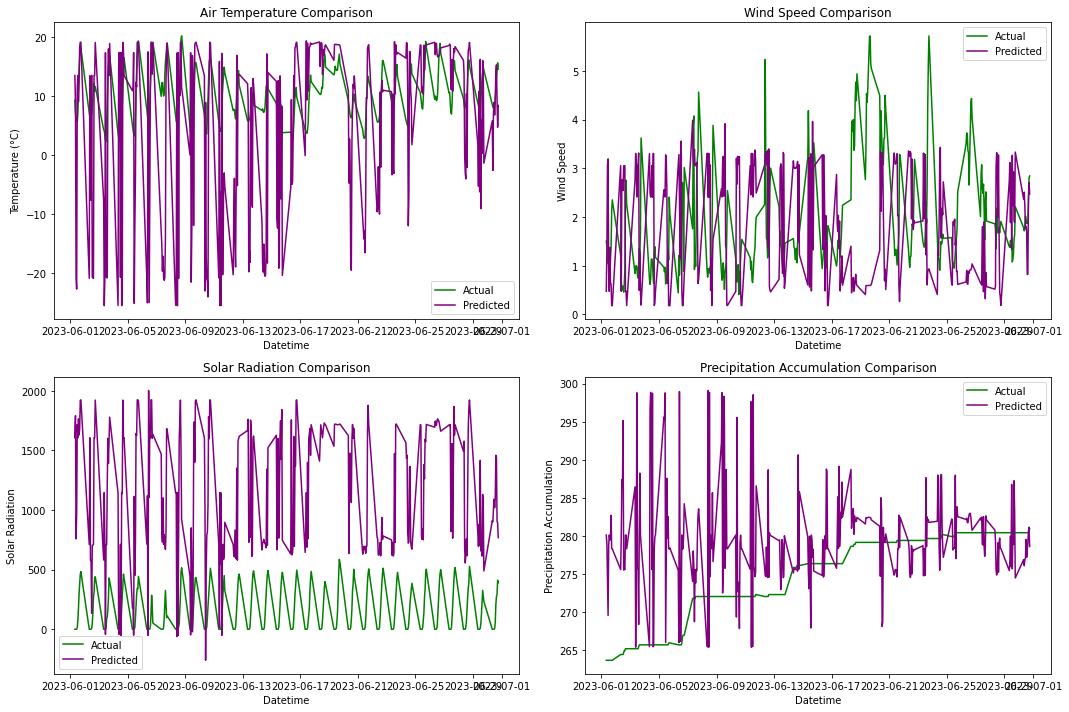

In [8]:
# Convert 'datetime' to numpy array
datetime_values = predictions_df_aggregated['datetime'].values.astype('datetime64[ns]')

# Convert variables to numpy arrays
air_temp_actual_values = predictions_df_aggregated['air_temp_actual'].values
air_temp_pred_values = predictions_df_aggregated['air_temp_pred'].values

wind_speed_actual_values = predictions_df_aggregated['wind_speed_actual'].values
wind_speed_pred_values = predictions_df_aggregated['wind_speed_pred'].values

solar_radiation_actual_values = predictions_df_aggregated['solar_radiation_actual'].values
solar_radiation_pred_values = predictions_df_aggregated['solar_radiation_pred'].values

precip_accum_actual_values = predictions_df_aggregated['precip_accum_actual'].values
precip_accum_pred_values = predictions_df_aggregated['precip_accum_pred'].values

# Define your new colors
actual_color = 'green'  
predicted_color = 'purple' 

# Plot all variables in one figure
plt.figure(figsize=(15, 10))

# Plot for Air Temperature
plt.subplot(221)
plt.plot(datetime_values, air_temp_actual_values, label='Actual', color=actual_color)
plt.plot(datetime_values, air_temp_pred_values, label='Predicted', color=predicted_color)
plt.title('Air Temperature Comparison')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot for Wind Speed
plt.subplot(222)
plt.plot(datetime_values, wind_speed_actual_values, label='Actual', color=actual_color)
plt.plot(datetime_values, wind_speed_pred_values, label='Predicted', color=predicted_color)
plt.title('Wind Speed Comparison')
plt.xlabel('Datetime')
plt.ylabel('Wind Speed')
plt.legend()

# Plot for Solar Radiation
plt.subplot(223)
plt.plot(datetime_values, solar_radiation_actual_values, label='Actual', color=actual_color)
plt.plot(datetime_values, solar_radiation_pred_values, label='Predicted', color=predicted_color)
plt.title('Solar Radiation Comparison')
plt.xlabel('Datetime')
plt.ylabel('Solar Radiation')
plt.legend()

# Plot for Precipitation Accumulation
plt.subplot(224)
plt.plot(datetime_values, precip_accum_actual_values, label='Actual', color=actual_color)
plt.plot(datetime_values, precip_accum_pred_values, label='Predicted', color=predicted_color)
plt.title('Precipitation Accumulation Comparison')
plt.xlabel('Datetime')
plt.ylabel('Precipitation Accumulation')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Las Vegas Data

In [9]:
# Extract features
X_lv = vegas_df.drop(columns=['Las Vegas_air_temp_set_1', 'Las Vegas_wind_speed_set_1', 'Las Vegas_solar_radiation_set_1', 'Las Vegas_precip_accum_set_1', 'Las Vegas_STATION_NUM', 'Las Vegas_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Define target variables
target_variables_lv = ['Las Vegas_air_temp_set_1', 'Las Vegas_wind_speed_set_1', 'Las Vegas_solar_radiation_set_1', 'Las Vegas_precip_accum_set_1']

# Extract the target variables
y_lv = vegas_df[target_variables_lv]

# Split the data into training and testing sets
X_train_lv, X_test_lv, y_train_lv, y_test_lv = train_test_split(X_lv.values, y_lv.values, test_size=0.2, random_state=42)

# Scale the features
scaler_X_lv = StandardScaler()
X_train_scaled_lv = scaler_X_lv.fit_transform(X_train_lv)
X_test_scaled_lv = scaler_X_lv.transform(X_test_lv)

# Scale the target variables
scaler_y_lv = StandardScaler()
y_train_scaled_lv = scaler_y_lv.fit_transform(y_train_lv)
y_test_scaled_lv = scaler_y_lv.transform(y_test_lv)

# Reshape data for LSTM
X_train_reshaped_lv = X_train_scaled_lv.reshape((X_train_scaled_lv.shape[0], 1, X_train_scaled_lv.shape[1]))
X_test_reshaped_lv = X_test_scaled_lv.reshape((X_test_scaled_lv.shape[0], 1, X_test_scaled_lv.shape[1]))

# Check the shapes of your data
print("Shapes:")
print("X_train_reshaped_lv:", X_train_reshaped_lv.shape)
print("y_train_scaled_lv:", y_train_scaled_lv.shape)
print("X_test_reshaped_lv:", X_test_reshaped_lv.shape)
print("y_test_scaled_lv:", y_test_scaled_lv.shape)

# Check that target_variable exists in y_test_lv
if isinstance(y_test_lv, pd.DataFrame):
    for target_variable_lv in target_variables_lv:
        if target_variable_lv not in y_test_lv.columns:
            print(f"Error: {target_variable_lv} not found in y_test_lv columns.")
else:
    print("Warning: y_test_lv is not a pandas DataFrame.")

# Build the multi-output LSTM model
model_lv = Sequential()
model_lv.add(LSTM(50, input_shape=(X_train_reshaped_lv.shape[1], X_train_reshaped_lv.shape[2])))
model_lv.add(Dense(64, activation='relu'))
model_lv.add(Dense(len(target_variables_lv)))  # Output layer with multiple neurons, one for each target variable

# Compile the model
model_lv.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lv.fit(X_train_reshaped_lv, y_train_scaled_lv, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Make predictions on the test set
y_pred_scaled_lv = model_lv.predict(X_test_reshaped_lv)

# Inverse scale the predictions to get them back to the original scale
y_pred_lv = scaler_y_lv.inverse_transform(y_pred_scaled_lv)

# Evaluate the model with MAE, MSE, and R2 for each target variable
for i in range(y_test_scaled_lv.shape[1]):
    y_test_array_lv = y_test_scaled_lv[:, i]
    y_pred_array_lv = y_pred_scaled_lv[:, i]

    mae_lv = mean_absolute_error(y_test_array_lv, y_pred_array_lv)
    mse_lv = mean_squared_error(y_test_array_lv, y_pred_array_lv)
    r2_lv = r2_score(y_test_array_lv, y_pred_array_lv)

    print(f'Target Variable {i + 1}')
    print(f'Mean Absolute Error: {mae_lv}')
    print(f'Mean Squared Error: {mse_lv}')
    print(f'R-squared: {r2_lv}')
    print('-' * 50)

Shapes:
X_train_reshaped_lv: (238945, 1, 9)
y_train_scaled_lv: (238945, 4)
X_test_reshaped_lv: (59737, 1, 9)
y_test_scaled_lv: (59737, 4)
1867/1867 [==============================] - 2s 1ms/step
Target Variable 1
Mean Absolute Error: 0.1930766632297103
Mean Squared Error: 0.09936602774201599
R-squared: 0.9008157514890354
--------------------------------------------------
Target Variable 2
Mean Absolute Error: 0.230085823405865
Mean Squared Error: 0.14248723460644103
R-squared: 0.8563677636873633
--------------------------------------------------
Target Variable 3
Mean Absolute Error: 0.05583777565449375
Mean Squared Error: 0.007729394127339041
R-squared: 0.9926169020038359
--------------------------------------------------
Target Variable 4
Mean Absolute Error: 0.11480623866874899
Mean Squared Error: 0.04163639738072757
R-squared: 0.9586139507703876
--------------------------------------------------


### Visualisation of 2023 actual and predicted data

In [10]:
# Use loaded models for predictions
X_2023_vegas = vegas_df.loc[vegas_df['YEAR'] == 2023].drop(columns=['Las Vegas_air_temp_set_1', 'Las Vegas_wind_speed_set_1', 'Las Vegas_solar_radiation_set_1', 'Las Vegas_precip_accum_set_1', 'Las Vegas_STATION_NUM', 'Las Vegas_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Scale the features
X_2023_scaled_vegas = scaler_X_lv.transform(X_2023_vegas.values)

# Reshape data for LSTM
X_2023_reshaped_vegas = X_2023_scaled_vegas.reshape((X_2023_scaled_vegas.shape[0], 1, X_2023_scaled_vegas.shape[1]))

# Make predictions on the 2023 data
y_2023_pred_scaled_vegas = model_lv.predict(X_2023_reshaped_vegas)

# Inverse scale the predictions to get them back to the original scale
y_2023_pred_vegas = scaler_y_lv.inverse_transform(y_2023_pred_scaled_vegas)

# Extract the actual target variables for 2023 (Vegas)
y_2023_actual_vegas = vegas_df.loc[vegas_df['YEAR'] == 2023, target_variables_lv].values

# Compare actual vs predicted for 2023 using evaluation metrics
for i, target_variable_lv in enumerate(target_variables_lv):
    y_2023_actual_array_vegas = y_2023_actual_vegas[:, i]
    y_2023_pred_array_vegas = y_2023_pred_vegas[:, i]

    mae_2023_vegas = mean_absolute_error(y_2023_actual_array_vegas, y_2023_pred_array_vegas)
    mse_2023_vegas = mean_squared_error(y_2023_actual_array_vegas, y_2023_pred_array_vegas)
    r2_2023_vegas = r2_score(y_2023_actual_array_vegas, y_2023_pred_array_vegas)

    print(f'Target Variable {i + 1} - {target_variable_lv}')
    print(f'Mean Absolute Error for 2023 (Vegas): {mae_2023_vegas}')
    print(f'Mean Squared Error for 2023 (Vegas): {mse_2023_vegas}')
    print(f'R-squared for 2023 (Vegas): {r2_2023_vegas}')
    print('-' * 50)

2148/2148 [==============================] - 3s 1ms/step
Target Variable 1 - Las Vegas_air_temp_set_1
Mean Absolute Error for 2023 (Vegas): 0.607653094265303
Mean Squared Error for 2023 (Vegas): 0.89203774557014
R-squared for 2023 (Vegas): 0.8922831801655502
--------------------------------------------------
Target Variable 2 - Las Vegas_wind_speed_set_1
Mean Absolute Error for 2023 (Vegas): 0.18820622383169083
Mean Squared Error for 2023 (Vegas): 0.0890642454211349
R-squared for 2023 (Vegas): 0.8588832732965926
--------------------------------------------------
Target Variable 3 - Las Vegas_solar_radiation_set_1
Mean Absolute Error for 2023 (Vegas): 1.839684799992381
Mean Squared Error for 2023 (Vegas): 7.2580871802546945
R-squared for 2023 (Vegas): 0.9874096944851132
--------------------------------------------------
Target Variable 4 - Las Vegas_precip_accum_set_1
Mean Absolute Error for 2023 (Vegas): 6.013570052045152
Mean Squared Error for 2023 (Vegas): 74.69542087029029
R-squared

In [11]:
# Assuming vegas_df has separate columns 'YEAR', 'MONTH', 'DAY', 'HOUR'
vegas_df['datetime'] = pd.to_datetime(vegas_df[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Extract features for the year 2023 (Vegas)
X_2023_vegas = vegas_df[vegas_df['YEAR'] == 2023].drop(columns=['Las Vegas_air_temp_set_1', 'Las Vegas_wind_speed_set_1', 'Las Vegas_solar_radiation_set_1', 'Las Vegas_precip_accum_set_1', 'Las Vegas_STATION_NUM', 'Las Vegas_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'datetime'])

# Make predictions using the RNN model for Vegas
y_pred_scaled_2023_vegas = model_lv.predict(X_2023_vegas.values.reshape((X_2023_vegas.shape[0], 1, X_2023_vegas.shape[1])))

# Inverse scale the predictions to get them back to the original scale for Vegas
y_pred_2023_vegas = scaler_y_lv.inverse_transform(y_pred_scaled_2023_vegas)

# Create a DataFrame for predictions for Vegas
predictions_df_vegas = pd.DataFrame({
    'datetime': vegas_df.loc[vegas_df['YEAR'] == 2023, 'datetime'],
    'air_temp_pred': y_pred_2023_vegas[:, 0],  # Assuming air_temp is the first target variable
    'wind_speed_pred': y_pred_2023_vegas[:, 1],  # Assuming wind_speed is the second target variable
    'solar_radiation_pred': y_pred_2023_vegas[:, 2],  # Assuming solar_radiation is the third target variable
    'precip_accum_pred': y_pred_2023_vegas[:, 3]  # Assuming precip_accum is the fourth target variable
})

# Merge the actual values from vegas_df with the predictions_df for Vegas
predictions_df_vegas = pd.merge(predictions_df_vegas, vegas_df[vegas_df['YEAR'] == 2023][[
    'datetime', 'Las Vegas_air_temp_set_1', 'Las Vegas_wind_speed_set_1',
    'Las Vegas_solar_radiation_set_1', 'Las Vegas_precip_accum_set_1'
]], on='datetime', how='left')

# Rename the actual columns for clarity for Vegas
predictions_df_vegas.rename(columns={
    'Las Vegas_air_temp_set_1': 'air_temp_actual',
    'Las Vegas_wind_speed_set_1': 'wind_speed_actual',
    'Las Vegas_solar_radiation_set_1': 'solar_radiation_actual',
    'Las Vegas_precip_accum_set_1': 'precip_accum_actual'
}, inplace=True)

# Convert 'datetime' to datetime type (if not already) for Vegas
predictions_df_vegas['datetime'] = pd.to_datetime(predictions_df_vegas['datetime'])

# Aggregate the data by taking the mean for duplicated entries for Vegas
predictions_df_aggregated_vegas = predictions_df_vegas.groupby('datetime').mean().reset_index()

# Display the aggregated DataFrame for Vegas
print(predictions_df_aggregated_vegas)

2148/2148 [==============================] - 3s 1ms/step
               datetime  air_temp_pred  wind_speed_pred  solar_radiation_pred  \
0   2023-06-01 08:00:00      13.511370         7.381665            317.384796   
1   2023-06-01 09:00:00      13.503242         7.376097            317.344360   
2   2023-06-01 10:00:00      13.431499         7.340003            317.885803   
3   2023-06-01 11:00:00      13.495260         7.370840            317.364136   
4   2023-06-01 12:00:00      13.511373         7.381666            317.384796   
..                  ...            ...              ...                   ...   
325 2023-06-30 14:00:00      16.825556         4.889097            290.798889   
326 2023-06-30 15:00:00      16.233282         5.218261            286.625183   
327 2023-06-30 16:00:00      15.788814         5.817116            275.912659   
328 2023-06-30 17:00:00      16.315823         5.943398            278.822845   
329 2023-06-30 18:00:00      15.560357         2.270

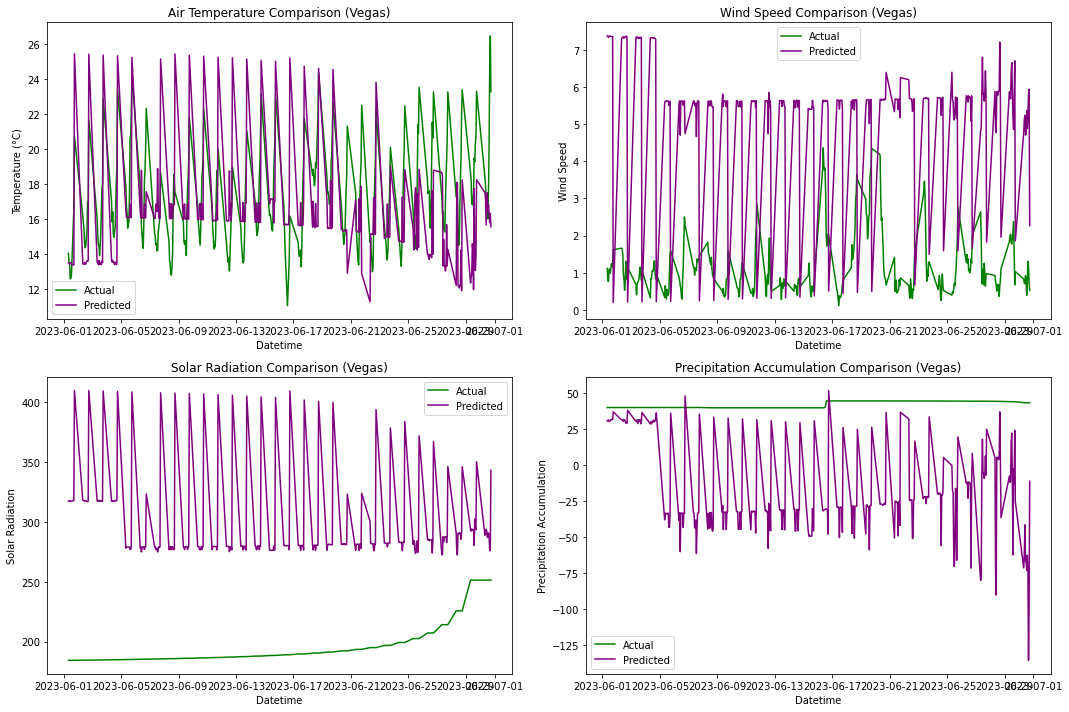

In [12]:
# Convert 'datetime' to numpy array for Vegas
datetime_values_vegas = predictions_df_aggregated_vegas['datetime'].values.astype('datetime64[ns]')

# Convert variables to numpy arrays for Vegas
air_temp_actual_values_vegas = predictions_df_aggregated_vegas['air_temp_actual'].values
air_temp_pred_values_vegas = predictions_df_aggregated_vegas['air_temp_pred'].values

wind_speed_actual_values_vegas = predictions_df_aggregated_vegas['wind_speed_actual'].values
wind_speed_pred_values_vegas = predictions_df_aggregated_vegas['wind_speed_pred'].values

solar_radiation_actual_values_vegas = predictions_df_aggregated_vegas['solar_radiation_actual'].values
solar_radiation_pred_values_vegas = predictions_df_aggregated_vegas['solar_radiation_pred'].values

precip_accum_actual_values_vegas = predictions_df_aggregated_vegas['precip_accum_actual'].values
precip_accum_pred_values_vegas = predictions_df_aggregated_vegas['precip_accum_pred'].values

# Define your new colors
actual_color = 'green'  
predicted_color = 'purple' 

# Plot all variables in one figure for Vegas
plt.figure(figsize=(15, 10))

# Plot for Air Temperature Vegas
plt.subplot(221)
plt.plot(datetime_values_vegas, air_temp_actual_values_vegas, label='Actual', color=actual_color)
plt.plot(datetime_values_vegas, air_temp_pred_values_vegas, label='Predicted', color=predicted_color)
plt.title('Air Temperature Comparison (Vegas)')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot for Wind Speed Vegas
plt.subplot(222)
plt.plot(datetime_values_vegas, wind_speed_actual_values_vegas, label='Actual', color=actual_color)
plt.plot(datetime_values_vegas, wind_speed_pred_values_vegas, label='Predicted', color=predicted_color)
plt.title('Wind Speed Comparison (Vegas)')
plt.xlabel('Datetime')
plt.ylabel('Wind Speed')
plt.legend()

# Plot for Solar Radiation Vegas
plt.subplot(223)
plt.plot(datetime_values_vegas, solar_radiation_actual_values_vegas, label='Actual', color=actual_color)
plt.plot(datetime_values_vegas, solar_radiation_pred_values_vegas, label='Predicted', color=predicted_color)
plt.title('Solar Radiation Comparison (Vegas)')
plt.xlabel('Datetime')
plt.ylabel('Solar Radiation')
plt.legend()

# Plot for Precipitation Accumulation Vegas
plt.subplot(224)
plt.plot(datetime_values_vegas, precip_accum_actual_values_vegas, label='Actual', color=actual_color)
plt.plot(datetime_values_vegas, precip_accum_pred_values_vegas, label='Predicted', color=predicted_color)
plt.title('Precipitation Accumulation Comparison (Vegas)')
plt.xlabel('Datetime')
plt.ylabel('Precipitation Accumulation')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots for Vegas
plt.show()

## Miami Data 

In [13]:
# Extract features
X_miami = miami_df.drop(columns=['Miami Beach_air_temp_set_1', 'Miami Beach_wind_speed_set_1', 'Miami Beach_solar_radiation_set_1', 'Miami Beach_STATION_NUM', 'Miami Beach_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Define target variables
target_variables_miami = ['Miami Beach_air_temp_set_1', 'Miami Beach_wind_speed_set_1', 'Miami Beach_solar_radiation_set_1']

# Extract the target variables
y_miami = miami_df[target_variables_miami]

# Split the data into training and testing sets
X_train_miami, X_test_miami, y_train_miami, y_test_miami = train_test_split(X_miami.values, y_miami.values, test_size=0.2, random_state=42)

# Scale the features
scaler_X_miami = StandardScaler()
X_train_scaled_miami = scaler_X_miami.fit_transform(X_train_miami)
X_test_scaled_miami = scaler_X_miami.transform(X_test_miami)

# Scale the target variables
scaler_y_miami = StandardScaler()
y_train_scaled_miami = scaler_y_miami.fit_transform(y_train_miami)
y_test_scaled_miami = scaler_y_miami.transform(y_test_miami)

# Reshape data for LSTM
X_train_reshaped_miami = X_train_scaled_miami.reshape((X_train_scaled_miami.shape[0], 1, X_train_scaled_miami.shape[1]))
X_test_reshaped_miami = X_test_scaled_miami.reshape((X_test_scaled_miami.shape[0], 1, X_test_scaled_miami.shape[1]))

# Check the shapes of your data
print("Shapes:")
print("X_train_reshaped_miami:", X_train_reshaped_miami.shape)
print("y_train_scaled_miami:", y_train_scaled_miami.shape)
print("X_test_reshaped_miami:", X_test_reshaped_miami.shape)
print("y_test_scaled_miami:", y_test_scaled_miami.shape)

# Check that target_variable exists in y_test_miami
if isinstance(y_test_miami, pd.DataFrame):
    for target_variable_miami in target_variables_miami:
        if target_variable_miami not in y_test_miami.columns:
            print(f"Error: {target_variable_miami} not found in y_test_miami columns.")
else:
    print("Warning: y_test_miami is not a pandas DataFrame.")

# Build the multi-output LSTM model
model_miami = Sequential()
model_miami.add(LSTM(50, input_shape=(X_train_reshaped_miami.shape[1], X_train_reshaped_miami.shape[2])))
model_miami.add(Dense(64, activation='relu'))
model_miami.add(Dense(len(target_variables_miami)))  # Output layer with multiple neurons, one for each target variable

# Compile the model
model_miami.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_miami.fit(X_train_reshaped_miami, y_train_scaled_miami, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Make predictions on the test set
y_pred_scaled_miami = model_miami.predict(X_test_reshaped_miami)

# Inverse scale the predictions to get them back to the original scale
y_pred_miami = scaler_y_miami.inverse_transform(y_pred_scaled_miami)

# Evaluate the model with MAE, MSE, and R2 for each target variable
for i in range(y_test_scaled_miami.shape[1]):
    y_test_array_miami = y_test_scaled_miami[:, i]
    y_pred_array_miami = y_pred_scaled_miami[:, i]

    mae_miami = mean_absolute_error(y_test_array_miami, y_pred_array_miami)
    mse_miami = mean_squared_error(y_test_array_miami, y_pred_array_miami)
    r2_miami = r2_score(y_test_array_miami, y_pred_array_miami)

    print(f'Target Variable {i + 1}')
    print(f'Mean Absolute Error: {mae_miami}')
    print(f'Mean Squared Error: {mse_miami}')
    print(f'R-squared: {r2_miami}')
    print('-' * 50)

Shapes:
X_train_reshaped_miami: (21992, 1, 4)
y_train_scaled_miami: (21992, 3)
X_test_reshaped_miami: (5498, 1, 4)
y_test_scaled_miami: (5498, 3)
172/172 [==============================] - 0s 896us/step
Target Variable 1
Mean Absolute Error: 0.2586152909829907
Mean Squared Error: 0.13227420634221942
R-squared: 0.8666062743921499
--------------------------------------------------
Target Variable 2
Mean Absolute Error: 0.15015081109186582
Mean Squared Error: 0.04589182479989825
R-squared: 0.9538663758869701
--------------------------------------------------
Target Variable 3
Mean Absolute Error: 0.510861310685296
Mean Squared Error: 0.4318294392985409
R-squared: 0.5299659062726203
--------------------------------------------------


### Visualisation of 2023 actual and predicted data

In [14]:
# Assuming you have loaded the RNN model and scaler objects for Miami
# Use loaded models for predictions
X_2023_miami = miami_df.loc[miami_df['YEAR'] == 2023].drop(columns=['Miami Beach_air_temp_set_1', 'Miami Beach_wind_speed_set_1', 'Miami Beach_solar_radiation_set_1', 'Miami Beach_STATION_NUM', 'Miami Beach_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Scale the features
X_2023_scaled_miami = scaler_X_miami.transform(X_2023_miami.values)

# Reshape data for LSTM
X_2023_reshaped_miami = X_2023_scaled_miami.reshape((X_2023_scaled_miami.shape[0], 1, X_2023_scaled_miami.shape[1]))

# Make predictions on the 2023 data
y_2023_pred_scaled_miami = model_miami.predict(X_2023_reshaped_miami)

# Inverse scale the predictions to get them back to the original scale
y_2023_pred_miami = scaler_y_miami.inverse_transform(y_2023_pred_scaled_miami)

# Extract the actual target variables for 2023 (Miami)
y_2023_actual_miami = miami_df.loc[miami_df['YEAR'] == 2023, target_variables_miami].values

# Compare actual vs predicted for 2023 using evaluation metrics
for i, target_variable_miami in enumerate(target_variables_miami):
    y_2023_actual_array_miami = y_2023_actual_miami[:, i]
    y_2023_pred_array_miami = y_2023_pred_miami[:, i]

    mae_2023_miami = mean_absolute_error(y_2023_actual_array_miami, y_2023_pred_array_miami)
    mse_2023_miami = mean_squared_error(y_2023_actual_array_miami, y_2023_pred_array_miami)
    r2_2023_miami = r2_score(y_2023_actual_array_miami, y_2023_pred_array_miami)

    print(f'Target Variable {i + 1} - {target_variable_miami}')
    print(f'Mean Absolute Error for 2023 (Miami): {mae_2023_miami}')
    print(f'Mean Squared Error for 2023 (Miami): {mse_2023_miami}')
    print(f'R-squared for 2023 (Miami): {r2_2023_miami}')
    print('-' * 50)

147/147 [==============================] - 0s 978us/step
Target Variable 1 - Miami Beach_air_temp_set_1
Mean Absolute Error for 2023 (Miami): 0.7392199362192856
Mean Squared Error for 2023 (Miami): 0.979018956109795
R-squared for 2023 (Miami): 0.875392181101527
--------------------------------------------------
Target Variable 2 - Miami Beach_wind_speed_set_1
Mean Absolute Error for 2023 (Miami): 0.05778030563877029
Mean Squared Error for 2023 (Miami): 0.007163497651874099
R-squared for 2023 (Miami): 0.9394652875830325
--------------------------------------------------
Target Variable 3 - Miami Beach_solar_radiation_set_1
Mean Absolute Error for 2023 (Miami): 83.23448327474468
Mean Squared Error for 2023 (Miami): 13221.80645781654
R-squared for 2023 (Miami): 0.5727693440478201
--------------------------------------------------


In [15]:
miami_df['datetime'] = pd.to_datetime(miami_df[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Extract features for the year 2023 (Miami)
X_2023_miami = miami_df[miami_df['YEAR'] == 2023].drop(columns=['Miami Beach_air_temp_set_1', 'Miami Beach_wind_speed_set_1', 'Miami Beach_solar_radiation_set_1', 'Miami Beach_STATION_NUM', 'Miami Beach_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'datetime'])

# Make predictions using the RNN model for Miami
y_pred_scaled_2023_miami = model_miami.predict(X_2023_miami.values.reshape((X_2023_miami.shape[0], 1, X_2023_miami.shape[1])))

# Inverse scale the predictions to get them back to the original scale for Miami
y_pred_2023_miami = scaler_y_miami.inverse_transform(y_pred_scaled_2023_miami)

# Create a DataFrame for predictions for Miami
predictions_df_miami = pd.DataFrame({
    'datetime': miami_df.loc[miami_df['YEAR'] == 2023, 'datetime'],
    'air_temp_pred': y_pred_2023_miami[:, 0],  # Assuming air_temp is the first target variable
    'wind_speed_pred': y_pred_2023_miami[:, 1],  # Assuming wind_speed is the second target variable
    'solar_radiation_pred': y_pred_2023_miami[:, 2]  # Assuming solar_radiation is the third target variable
})

# Merge the actual values from miami_df with the predictions_df for Miami
predictions_df_miami = pd.merge(predictions_df_miami, miami_df[miami_df['YEAR'] == 2023][[
    'datetime', 'Miami Beach_air_temp_set_1', 'Miami Beach_wind_speed_set_1',
    'Miami Beach_solar_radiation_set_1'
]], on='datetime', how='left')

# Rename the actual columns for clarity for Miami
predictions_df_miami.rename(columns={
    'Miami Beach_air_temp_set_1': 'air_temp_actual',
    'Miami Beach_wind_speed_set_1': 'wind_speed_actual',
    'Miami Beach_solar_radiation_set_1': 'solar_radiation_actual'
}, inplace=True)

# Convert 'datetime' to datetime type (if not already) for Miami
predictions_df_miami['datetime'] = pd.to_datetime(predictions_df_miami['datetime'])

# Aggregate the data by taking the mean for duplicated entries for Miami
predictions_df_aggregated_miami = predictions_df_miami.groupby('datetime').mean().reset_index()

# Display the aggregated DataFrame for Miami
print(predictions_df_aggregated_miami)

147/147 [==============================] - 0s 948us/step
               datetime  air_temp_pred  wind_speed_pred  solar_radiation_pred  \
0   2023-06-01 08:00:00      35.855667        -0.616153           1334.791626   
1   2023-06-01 09:00:00      35.855667        -0.616153           1334.791626   
2   2023-06-01 10:00:00      35.855667        -0.616153           1334.791626   
3   2023-06-01 11:00:00      35.855667        -0.616153           1334.791626   
4   2023-06-01 12:00:00      35.855667        -0.616153           1334.791626   
..                  ...            ...              ...                   ...   
297 2023-06-30 13:00:00      35.855667        -0.616153           1334.791626   
298 2023-06-30 14:00:00      35.855667        -0.616153           1334.791626   
299 2023-06-30 15:00:00      35.855667        -0.616153           1334.791626   
300 2023-06-30 16:00:00      35.855667        -0.616153           1334.791626   
301 2023-06-30 17:00:00      35.855667        -0.616

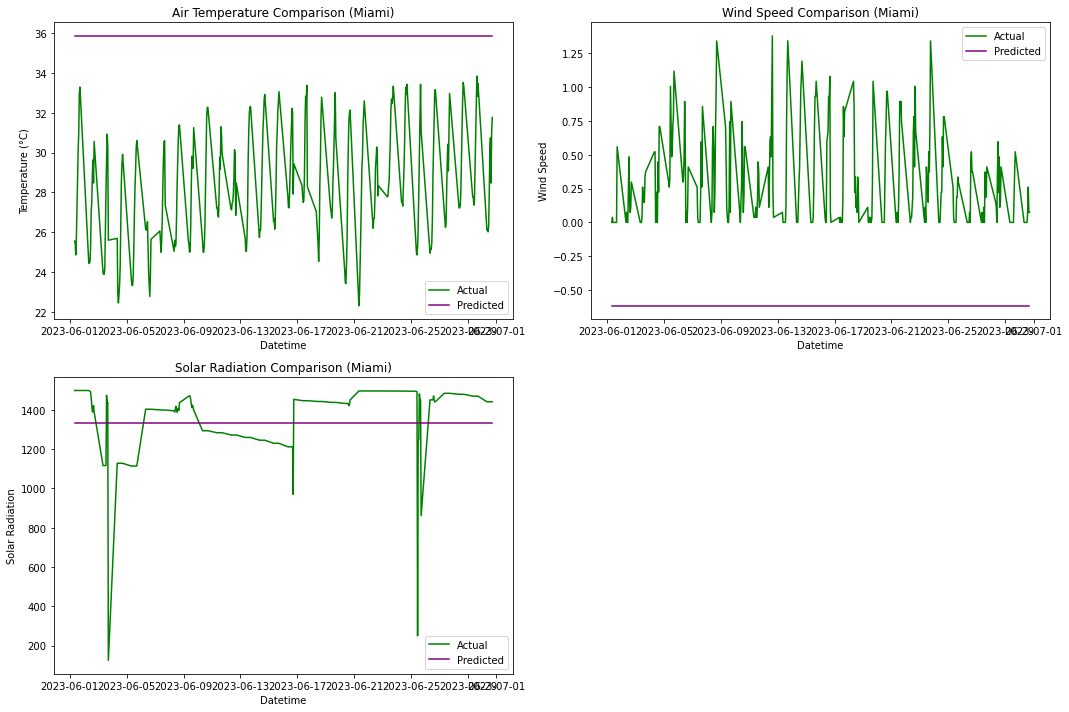

In [16]:
# Convert 'datetime' to numpy array for Miami
datetime_values_miami = predictions_df_aggregated_miami['datetime'].values.astype('datetime64[ns]')

# Convert variables to numpy arrays for Miami
air_temp_actual_values_miami = predictions_df_aggregated_miami['air_temp_actual'].values
air_temp_pred_values_miami = predictions_df_aggregated_miami['air_temp_pred'].values

wind_speed_actual_values_miami = predictions_df_aggregated_miami['wind_speed_actual'].values
wind_speed_pred_values_miami = predictions_df_aggregated_miami['wind_speed_pred'].values

solar_radiation_actual_values_miami = predictions_df_aggregated_miami['solar_radiation_actual'].values
solar_radiation_pred_values_miami = predictions_df_aggregated_miami['solar_radiation_pred'].values

# Define your new colors
actual_color = 'green'  
predicted_color = 'purple'  

# Plot all variables in one figure for Miami
plt.figure(figsize=(15, 10))

# Plot for Air Temperature Miami
plt.subplot(221)
plt.plot(datetime_values_miami, air_temp_actual_values_miami, label='Actual', color=actual_color)
plt.plot(datetime_values_miami, air_temp_pred_values_miami, label='Predicted', color=predicted_color)
plt.title('Air Temperature Comparison (Miami)')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot for Wind Speed Miami
plt.subplot(222)
plt.plot(datetime_values_miami, wind_speed_actual_values_miami, label='Actual', color=actual_color)
plt.plot(datetime_values_miami, wind_speed_pred_values_miami, label='Predicted', color=predicted_color)
plt.title('Wind Speed Comparison (Miami)')
plt.xlabel('Datetime')
plt.ylabel('Wind Speed')
plt.legend()

# Plot for Solar Radiation Miami
plt.subplot(223)
plt.plot(datetime_values_miami, solar_radiation_actual_values_miami, label='Actual', color=actual_color)
plt.plot(datetime_values_miami, solar_radiation_pred_values_miami, label='Predicted', color=predicted_color)
plt.title('Solar Radiation Comparison (Miami)')
plt.xlabel('Datetime')
plt.ylabel('Solar Radiation')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots for Miami
plt.show()

## Disney Data 

In [17]:
# Extract features
X_disney = disney_df.drop(columns=['Walt Disney Parks & Resorts_air_temp_set_1', 'Walt Disney Parks & Resorts_wind_speed_set_1', 'Walt Disney Parks & Resorts_precip_accum_set_1', 'Walt Disney Parks & Resorts_STATION_NUM', 'Walt Disney Parks & Resorts_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Define target variables
target_variables_disney = ['Walt Disney Parks & Resorts_air_temp_set_1', 'Walt Disney Parks & Resorts_wind_speed_set_1', 'Walt Disney Parks & Resorts_precip_accum_set_1']

# Extract the target variables
y_disney = disney_df[target_variables_disney]

# Split the data into training and testing sets
X_train_disney, X_test_disney, y_train_disney, y_test_disney = train_test_split(X_disney.values, y_disney.values, test_size=0.2, random_state=42)

# Scale the features
scaler_X_disney = StandardScaler()
X_train_scaled_disney = scaler_X_disney.fit_transform(X_train_disney)
X_test_scaled_disney = scaler_X_disney.transform(X_test_disney)

# Scale the target variables
scaler_y_disney = StandardScaler()
y_train_scaled_disney = scaler_y_disney.fit_transform(y_train_disney)
y_test_scaled_disney = scaler_y_disney.transform(y_test_disney)

# Reshape data for LSTM
X_train_reshaped_disney = X_train_scaled_disney.reshape((X_train_scaled_disney.shape[0], 1, X_train_scaled_disney.shape[1]))
X_test_reshaped_disney = X_test_scaled_disney.reshape((X_test_scaled_disney.shape[0], 1, X_test_scaled_disney.shape[1]))

# Check the shapes of your data
print("Shapes:")
print("X_train_reshaped_disney:", X_train_reshaped_disney.shape)
print("y_train_scaled_disney:", y_train_scaled_disney.shape)
print("X_test_reshaped_disney:", X_test_reshaped_disney.shape)
print("y_test_scaled_disney:", y_test_scaled_disney.shape)

# Check that target_variable exists in y_test_disney
if isinstance(y_test_disney, pd.DataFrame):
    for target_variable_disney in target_variables_disney:
        if target_variable_disney not in y_test_disney.columns:
            print(f"Error: {target_variable_disney} not found in y_test_disney columns.")
else:
    print("Warning: y_test_disney is not a pandas DataFrame.")

# Build the multi-output LSTM model
model_disney = Sequential()
model_disney.add(LSTM(50, input_shape=(X_train_reshaped_disney.shape[1], X_train_reshaped_disney.shape[2])))
model_disney.add(Dense(64, activation='relu'))
model_disney.add(Dense(len(target_variables_disney)))  # Output layer with multiple neurons, one for each target variable

# Compile the model
model_disney.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_disney.fit(X_train_reshaped_disney, y_train_scaled_disney, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Make predictions on the test set
y_pred_scaled_disney = model_disney.predict(X_test_reshaped_disney)

# Inverse scale the predictions to get them back to the original scale
y_pred_disney = scaler_y_disney.inverse_transform(y_pred_scaled_disney)

# Evaluate the model with MAE, MSE, and R2 for each target variable
for i in range(y_test_scaled_disney.shape[1]):
    y_test_array_disney = y_test_scaled_disney[:, i]
    y_pred_array_disney = y_pred_scaled_disney[:, i]

    mae_disney = mean_absolute_error(y_test_array_disney, y_pred_array_disney)
    mse_disney = mean_squared_error(y_test_array_disney, y_pred_array_disney)
    r2_disney = r2_score(y_test_array_disney, y_pred_array_disney)

    print(f'Target Variable {i + 1}')
    print(f'Mean Absolute Error: {mae_disney}')
    print(f'Mean Squared Error: {mse_disney}')
    print(f'R-squared: {r2_disney}')
    print('-' * 50)

Shapes:
X_train_reshaped_disney: (197899, 1, 7)
y_train_scaled_disney: (197899, 3)
X_test_reshaped_disney: (49475, 1, 7)
y_test_scaled_disney: (49475, 3)
1547/1547 [==============================] - 2s 1ms/step
Target Variable 1
Mean Absolute Error: 0.12409820261505408
Mean Squared Error: 0.03249740712776522
R-squared: 0.9674810267965656
--------------------------------------------------
Target Variable 2
Mean Absolute Error: 0.16725866812824047
Mean Squared Error: 0.08316382242920262
R-squared: 0.9169034135481946
--------------------------------------------------
Target Variable 3
Mean Absolute Error: 0.09389589929606477
Mean Squared Error: 0.02316677820921924
R-squared: 0.9762555190679972
--------------------------------------------------


### Visualisation of 2023 actual and predicted data

In [18]:
# Assuming you have loaded the RNN model and scaler objects for Disney
# Use loaded models for predictions
X_2023_disney = disney_df.loc[disney_df['YEAR'] == 2023].drop(columns=['Walt Disney Parks & Resorts_air_temp_set_1', 'Walt Disney Parks & Resorts_wind_speed_set_1', 'Walt Disney Parks & Resorts_precip_accum_set_1', 'Walt Disney Parks & Resorts_STATION_NUM', 'Walt Disney Parks & Resorts_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])

# Scale the features
X_2023_scaled_disney = scaler_X_disney.transform(X_2023_disney.values)

# Reshape data for LSTM
X_2023_reshaped_disney = X_2023_scaled_disney.reshape((X_2023_scaled_disney.shape[0], 1, X_2023_scaled_disney.shape[1]))

# Make predictions on the 2023 data
y_2023_pred_scaled_disney = model_disney.predict(X_2023_reshaped_disney)

# Inverse scale the predictions to get them back to the original scale
y_2023_pred_disney = scaler_y_disney.inverse_transform(y_2023_pred_scaled_disney)

# Extract the actual target variables for 2023 (Disney)
y_2023_actual_disney = disney_df.loc[disney_df['YEAR'] == 2023, target_variables_disney].values

# Compare actual vs predicted for 2023 using evaluation metrics
for i, target_variable_disney in enumerate(target_variables_disney):
    y_2023_actual_array_disney = y_2023_actual_disney[:, i]
    y_2023_pred_array_disney = y_2023_pred_disney[:, i]

    mae_2023_disney = mean_absolute_error(y_2023_actual_array_disney, y_2023_pred_array_disney)
    mse_2023_disney = mean_squared_error(y_2023_actual_array_disney, y_2023_pred_array_disney)
    r2_2023_disney = r2_score(y_2023_actual_array_disney, y_2023_pred_array_disney)

    print(f'Target Variable {i + 1} - {target_variable_disney}')
    print(f'Mean Absolute Error for 2023 (Disney): {mae_2023_disney}')
    print(f'Mean Squared Error for 2023 (Disney): {mse_2023_disney}')
    print(f'R-squared for 2023 (Disney): {r2_2023_disney}')
    print('-' * 50)

2261/2261 [==============================] - 3s 1ms/step
Target Variable 1 - Walt Disney Parks & Resorts_air_temp_set_1
Mean Absolute Error for 2023 (Disney): 0.38346712388177223
Mean Squared Error for 2023 (Disney): 0.3293349722543536
R-squared for 2023 (Disney): 0.9745458856555966
--------------------------------------------------
Target Variable 2 - Walt Disney Parks & Resorts_wind_speed_set_1
Mean Absolute Error for 2023 (Disney): 0.11141717816562195
Mean Squared Error for 2023 (Disney): 0.038020742706043824
R-squared for 2023 (Disney): 0.9325761110923794
--------------------------------------------------
Target Variable 3 - Walt Disney Parks & Resorts_precip_accum_set_1
Mean Absolute Error for 2023 (Disney): 1.000673821505379
Mean Squared Error for 2023 (Disney): 2.5317692468885644
R-squared for 2023 (Disney): -44.806813650796585
--------------------------------------------------


In [19]:
# Assuming disney_df has separate columns 'YEAR', 'MONTH', 'DAY', 'HOUR'
disney_df['datetime'] = pd.to_datetime(disney_df[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Extract features for the year 2023 (Disney)
X_2023_disney = disney_df[disney_df['YEAR'] == 2023].drop(columns=['Walt Disney Parks & Resorts_air_temp_set_1', 'Walt Disney Parks & Resorts_wind_speed_set_1', 'Walt Disney Parks & Resorts_precip_accum_set_1', 'Walt Disney Parks & Resorts_STATION_NUM', 'Walt Disney Parks & Resorts_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'datetime'])

# Make predictions using the RNN model for Disney
y_pred_scaled_2023_disney = model_disney.predict(X_2023_disney.values.reshape((X_2023_disney.shape[0], 1, X_2023_disney.shape[1])))

# Inverse scale the predictions to get them back to the original scale for Disney
y_pred_2023_disney = scaler_y_disney.inverse_transform(y_pred_scaled_2023_disney)

# Create a DataFrame for predictions for Disney
predictions_df_disney = pd.DataFrame({
    'datetime': disney_df.loc[disney_df['YEAR'] == 2023, 'datetime'],
    'air_temp_pred': y_pred_2023_disney[:, 0],  # Assuming air_temp is the first target variable
    'wind_speed_pred': y_pred_2023_disney[:, 1],  # Assuming wind_speed is the second target variable
    'precip_accum_pred': y_pred_2023_disney[:, 2]  # Assuming precip_accum is the third target variable
})

# Merge the actual values from disney_df with the predictions_df for Disney
predictions_df_disney = pd.merge(predictions_df_disney, disney_df[disney_df['YEAR'] == 2023][[
    'datetime', 'Walt Disney Parks & Resorts_air_temp_set_1', 'Walt Disney Parks & Resorts_wind_speed_set_1',
    'Walt Disney Parks & Resorts_precip_accum_set_1'
]], on='datetime', how='left')

# Rename the actual columns for clarity for Disney
predictions_df_disney.rename(columns={
    'Walt Disney Parks & Resorts_air_temp_set_1': 'air_temp_actual',
    'Walt Disney Parks & Resorts_wind_speed_set_1': 'wind_speed_actual',
    'Walt Disney Parks & Resorts_precip_accum_set_1': 'precip_accum_actual'
}, inplace=True)

# Convert 'datetime' to datetime type (if not already) for Disney
predictions_df_disney['datetime'] = pd.to_datetime(predictions_df_disney['datetime'])

# Aggregate the data by taking the mean for duplicated entries for Disney
predictions_df_aggregated_disney = predictions_df_disney.groupby('datetime').mean().reset_index()

# Display the aggregated DataFrame for Disney
print(predictions_df_aggregated_disney)

2261/2261 [==============================] - 3s 1ms/step
               datetime  air_temp_pred  wind_speed_pred  precip_accum_pred  \
0   2023-06-01 08:00:00      33.856255         2.772109          83.288002   
1   2023-06-01 09:00:00      33.856255         2.772109          83.288002   
2   2023-06-01 10:00:00      33.856255         2.772109          83.288002   
3   2023-06-01 11:00:00      33.856255         2.772109          83.288002   
4   2023-06-01 12:00:00      33.856255         2.772109          83.288002   
..                  ...            ...              ...                ...   
325 2023-06-30 14:00:00      33.856255         2.772109          83.288002   
326 2023-06-30 15:00:00      33.856255         2.772109          83.288002   
327 2023-06-30 16:00:00      33.856255         2.772109          83.288002   
328 2023-06-30 17:00:00      33.856255         2.772109          83.288002   
329 2023-06-30 18:00:00      33.856255         2.772109          83.288002   

     a

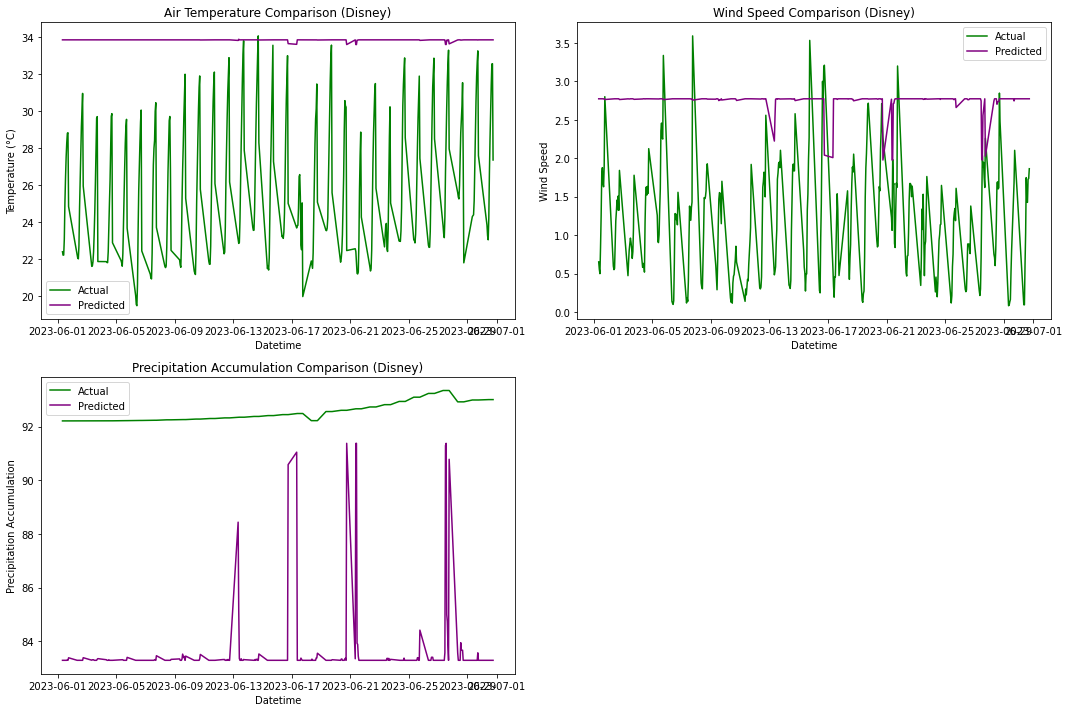

In [20]:
# Convert 'datetime' to numpy array for Disney
datetime_values_disney = predictions_df_aggregated_disney['datetime'].values.astype('datetime64[ns]')

# Convert variables to numpy arrays for Disney
air_temp_actual_values_disney = predictions_df_aggregated_disney['air_temp_actual'].values
air_temp_pred_values_disney = predictions_df_aggregated_disney['air_temp_pred'].values

wind_speed_actual_values_disney = predictions_df_aggregated_disney['wind_speed_actual'].values
wind_speed_pred_values_disney = predictions_df_aggregated_disney['wind_speed_pred'].values

precip_accum_actual_values_disney = predictions_df_aggregated_disney['precip_accum_actual'].values
precip_accum_pred_values_disney = predictions_df_aggregated_disney['precip_accum_pred'].values

# Define your new colors
actual_color = 'green'  
predicted_color = 'purple' 

# Plot all variables in one figure for Disney
plt.figure(figsize=(15, 10))

# Plot for Air Temperature Disney
plt.subplot(221)
plt.plot(datetime_values_disney, air_temp_actual_values_disney, label='Actual', color=actual_color)
plt.plot(datetime_values_disney, air_temp_pred_values_disney, label='Predicted', color=predicted_color)
plt.title('Air Temperature Comparison (Disney)')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot for Wind Speed Disney
plt.subplot(222)
plt.plot(datetime_values_disney, wind_speed_actual_values_disney, label='Actual', color=actual_color)
plt.plot(datetime_values_disney, wind_speed_pred_values_disney, label='Predicted', color=predicted_color)
plt.title('Wind Speed Comparison (Disney)')
plt.xlabel('Datetime')
plt.ylabel('Wind Speed')
plt.legend()

# Plot for Precipitation Accumulation Disney
plt.subplot(223)
plt.plot(datetime_values_disney, precip_accum_actual_values_disney, label='Actual', color=actual_color)
plt.plot(datetime_values_disney, precip_accum_pred_values_disney, label='Predicted', color=predicted_color)
plt.title('Precipitation Accumulation Comparison (Disney)')
plt.xlabel('Datetime')
plt.ylabel('Precipitation Accumulation')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots for Disney
plt.show()